In [1]:
#improting libraries
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use("grayscale")

In [2]:
#defining global constants
R_e = 6.370*1e6 #earth's radius
tilt = np.radians(9.6) #angle between earth's magnetic pole relative to z'axis
B_0 = 3.12e-5 #estimated magnetic field at earths surphase    
charge = 1e-19 #proton charge
mass = 1.67e-27 #proton mass

In [3]:
#defining functions
def get_grid(L, n):
    x = np.linspace(-L, L, n)
    y = np.linspace(-L, L, n)
    grid = np.meshgrid(x, y)
    X, Y = grid[0], grid[1]
    r = np.hypot(X, Y)
    theta = np.arctan2(Y, X)
    return x, y, grid, r, theta

def B_dipole_alphaver(grid, r_m, m_vec):
    R = np.subtract(np.transpose(grid), r_m).T 
    R_norm = np.sqrt(np.einsum("i..., i...", R, R))
    H = 3*np.tensordot(m_vec, R, axes = 1)*R/R_norm**5 - np.tensordot(m_vec, R_norm**-3, axes = 0)
    return H #*1e-7

def B_dipole_P(r, theta):
    term = B_0*(R_e/r)**3
    B_r = 2*term*np.cos(theta+tilt)
    B_theta = term*np.sin(theta+tilt)
    B_x = B_r*np.cos(np.pi/2 + theta) - B_theta*np.sin(np.pi/2 + theta)
    B_y = B_r*np.sin(np.pi/2 + theta) + B_theta*np.cos(np.pi/2 + theta)
    return B_x, B_y

def B_dipole_C(x, y, z, r, m_vec):
    m_x, m_y, m_z = m_vec[0], m_vec[1], m_vec[2]
    B_x = 3*(m_x*x**2 + x*z*m_z)/r**5 - m_x/r**3
    B_y = 3*(y*x*m_x + y*z*m_z)/r**5
    B_z = 3*(z*x*m_x + m_z*z**2)/r**5 - m_z/r**3
    return B_x*B_0*R_e**3, B_y*B_0*R_e**3, B_z*B_0*R_e**3      

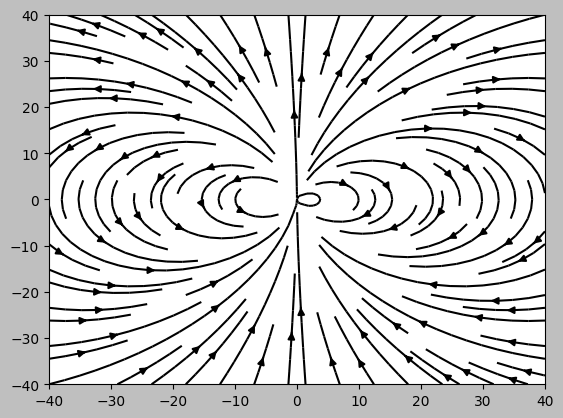

In [4]:
#test alternative
x, y, grid, r, theta = get_grid(40, 100)
m_vec = np.array([0, 1])
r_m = np.array([0, 0])

B_x, B_y = B_dipole_alphaver(grid, r_m, m_vec) 
plt.streamplot(x, y, B_x, B_y, color = 'k')
plt.show()

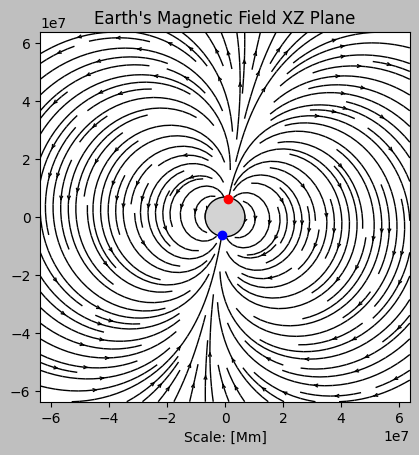

In [5]:
x, y, grid, r, theta = get_grid(10*R_e, 100)
B_x, B_y = B_dipole_P(r, theta)

fig_A, ax = plt.subplots()
ax.streamplot(x, y, -B_x, -B_y, color = 'black', linewidth = 1, density = 1.6, arrowstyle = '->', arrowsize = 0.5)

ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.plot(R_e*np.sin(tilt), R_e*np.cos(tilt), 'ro', zorder=100)
ax.plot(-R_e*np.sin(tilt), -R_e*np.cos(tilt), 'bo', zorder=100)
ax.set_aspect('equal')
ax.set_xlabel('Scale: [Mm]')
ax.set_title("Earth's Magnetic Field XZ Plane")
plt.style.use("grayscale")
plt.show()

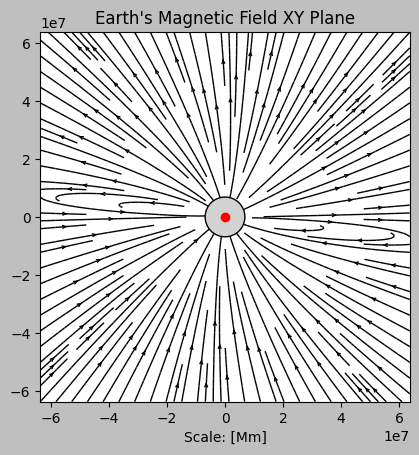

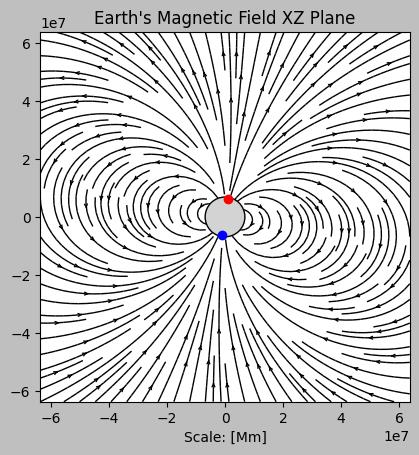

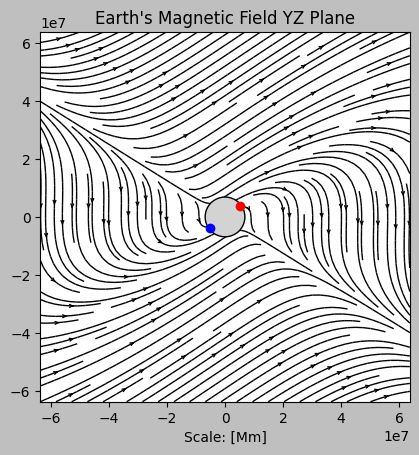

In [6]:
x, z, grid_xz, r, theta = get_grid(10*R_e, 100)
x, y, grid_xy, r, theta = get_grid(10*R_e, 100)

m = 1
m_vec = np.array([m*np.sin(tilt), 0, m*np.cos(tilt)])
B_x, B_y, B_z = B_dipole_C(grid_xy[0], grid_xy[1], grid_xz[1], r, m_vec)

fig_B, ax = plt.subplots()
ax.streamplot(x, y, B_x, B_y, color = 'black', linewidth = 1, density = 1.6, arrowstyle = '->', arrowsize = 0.5)
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.plot(np.sin(tilt), np.cos(tilt), 'ro', zorder=100)
#ax.plot(-R_e*np.sin(tilt), -R_e*np.cos(tilt), 'bo', zorder=100)
ax.set_aspect('equal')
ax.set_xlabel('Scale: [Mm]')
ax.set_title("Earth's Magnetic Field XY Plane")
plt.show()

fig_C, ax = plt.subplots()
ax.streamplot(x, z, B_x, B_z, color = 'black', linewidth = 1, density = 1.6, arrowstyle = '->', arrowsize = 0.5)
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.plot(R_e*np.sin(tilt), R_e*np.cos(tilt), 'ro', zorder=100)
ax.plot(-R_e*np.sin(tilt), -R_e*np.cos(tilt), 'bo', zorder=100)
ax.set_aspect('equal')
ax.set_xlabel('Scale: [Mm]')
ax.set_title("Earth's Magnetic Field XZ Plane")
plt.show()

fig_D, ax = plt.subplots()
ax.streamplot(y, z, B_y, B_z, color = 'black', linewidth = 1, density = 1.6, arrowstyle = '->', arrowsize = 0.5)
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.plot(R_e*np.sin(tilt+0.25*np.pi), R_e*np.cos(tilt+0.25*np.pi), 'ro', zorder=100)
ax.plot(-R_e*np.sin(tilt+0.25*np.pi), -R_e*np.cos(tilt+0.25*np.pi), 'bo', zorder=100)
ax.set_aspect('equal')
ax.set_xlabel('Scale: [Mm]')
ax.set_title("Earth's Magnetic Field YZ Plane")
plt.show()

In [7]:
def get_acceleration(v, r):
    r_norm = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
    B_x, B_y, B_z = B_dipole_C(r[0], r[1], r[2], r_norm, m_vec)
    F_x = v[1]*B_z-v[2]*B_y
    F_y = v[2]*B_x-v[0]*B_z
    F_z = v[0]*B_y-v[1]*B_x 
    return np.array([F_x, F_y, F_z])*charge/mass

def RK4_step(v_i, r_i, dt):
    k_1v = get_acceleration(v_i, r_i)
    k_1r = v_i
    k_2v = get_acceleration(v_i+k_1v*(dt/2), r_i+k_1r*(dt/2))
    k_2r = v_i+k_1v*(dt/2)
    k_3v = get_acceleration(v_i+k_2v*(dt/2), r_i+k_2r*(dt/2))
    k_3r = v_i+k_2v*(dt/2)
    k_4v = get_acceleration(v_i+k_3v*(dt), r_i+k_3r*(dt))
    k_4r = v_i+k_3v*(dt)
    v_next = v_i + dt*(k_1v+2*k_2v+2*k_3v+k_4v)/6
    r_next = r_i + dt*(k_1r+2*k_2r+2*k_3r+k_4r)/6
    return v_next, r_next
    
def RK4_method_single(vel, pos, T, dt):
    for i in range(1, T):
        vel[i], pos[i] = RK4_step(vel[i-1], pos[i-1], dt)
    return vel, pos

In [8]:
M = 1 #number of protons
t_0 = 0
t_f = 1e4
dt = 0.01
T = int((t_f-t_0)/dt)
v_init = np.array([50*1e3, 400*1e3, -300*1e3])    #expected 400e3 m/s
r_init = np.array([0, -10*R_e, -R_e])

m = 1
m_vec = np.array([m*np.sin(tilt), 0, m*np.cos(tilt)])

wind_v = np.zeros((M, T, 3))
wind_v[0][0] = v_init
wind_r = np.zeros((M, T, 3))
wind_r[0][0] = r_init
t_vals = np.linspace(t_0, t_f, T)
wind, pos = RK4_method_single(wind_v[0], wind_r[0], T, dt) #for one M

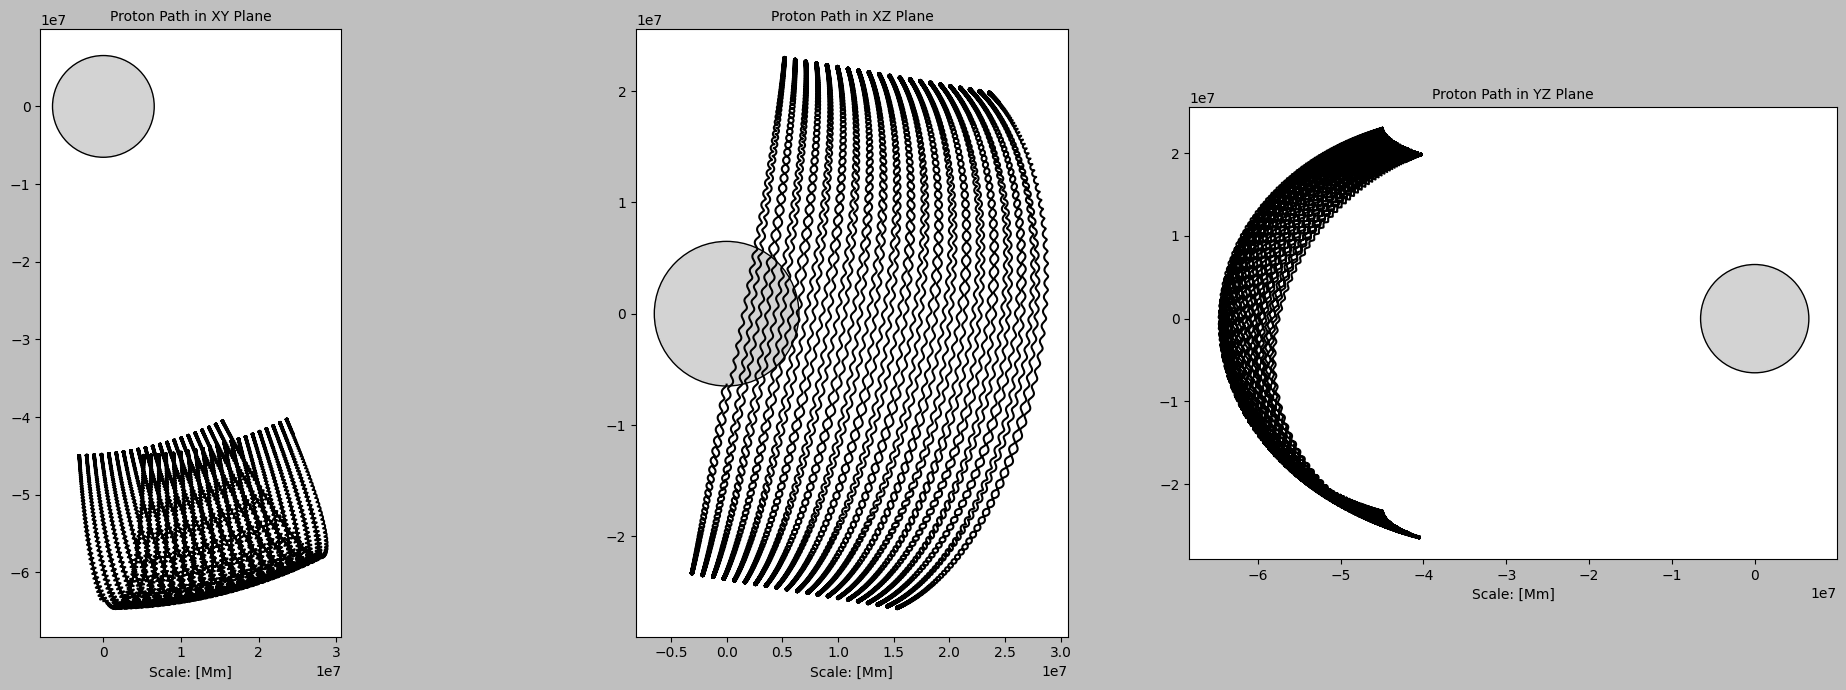

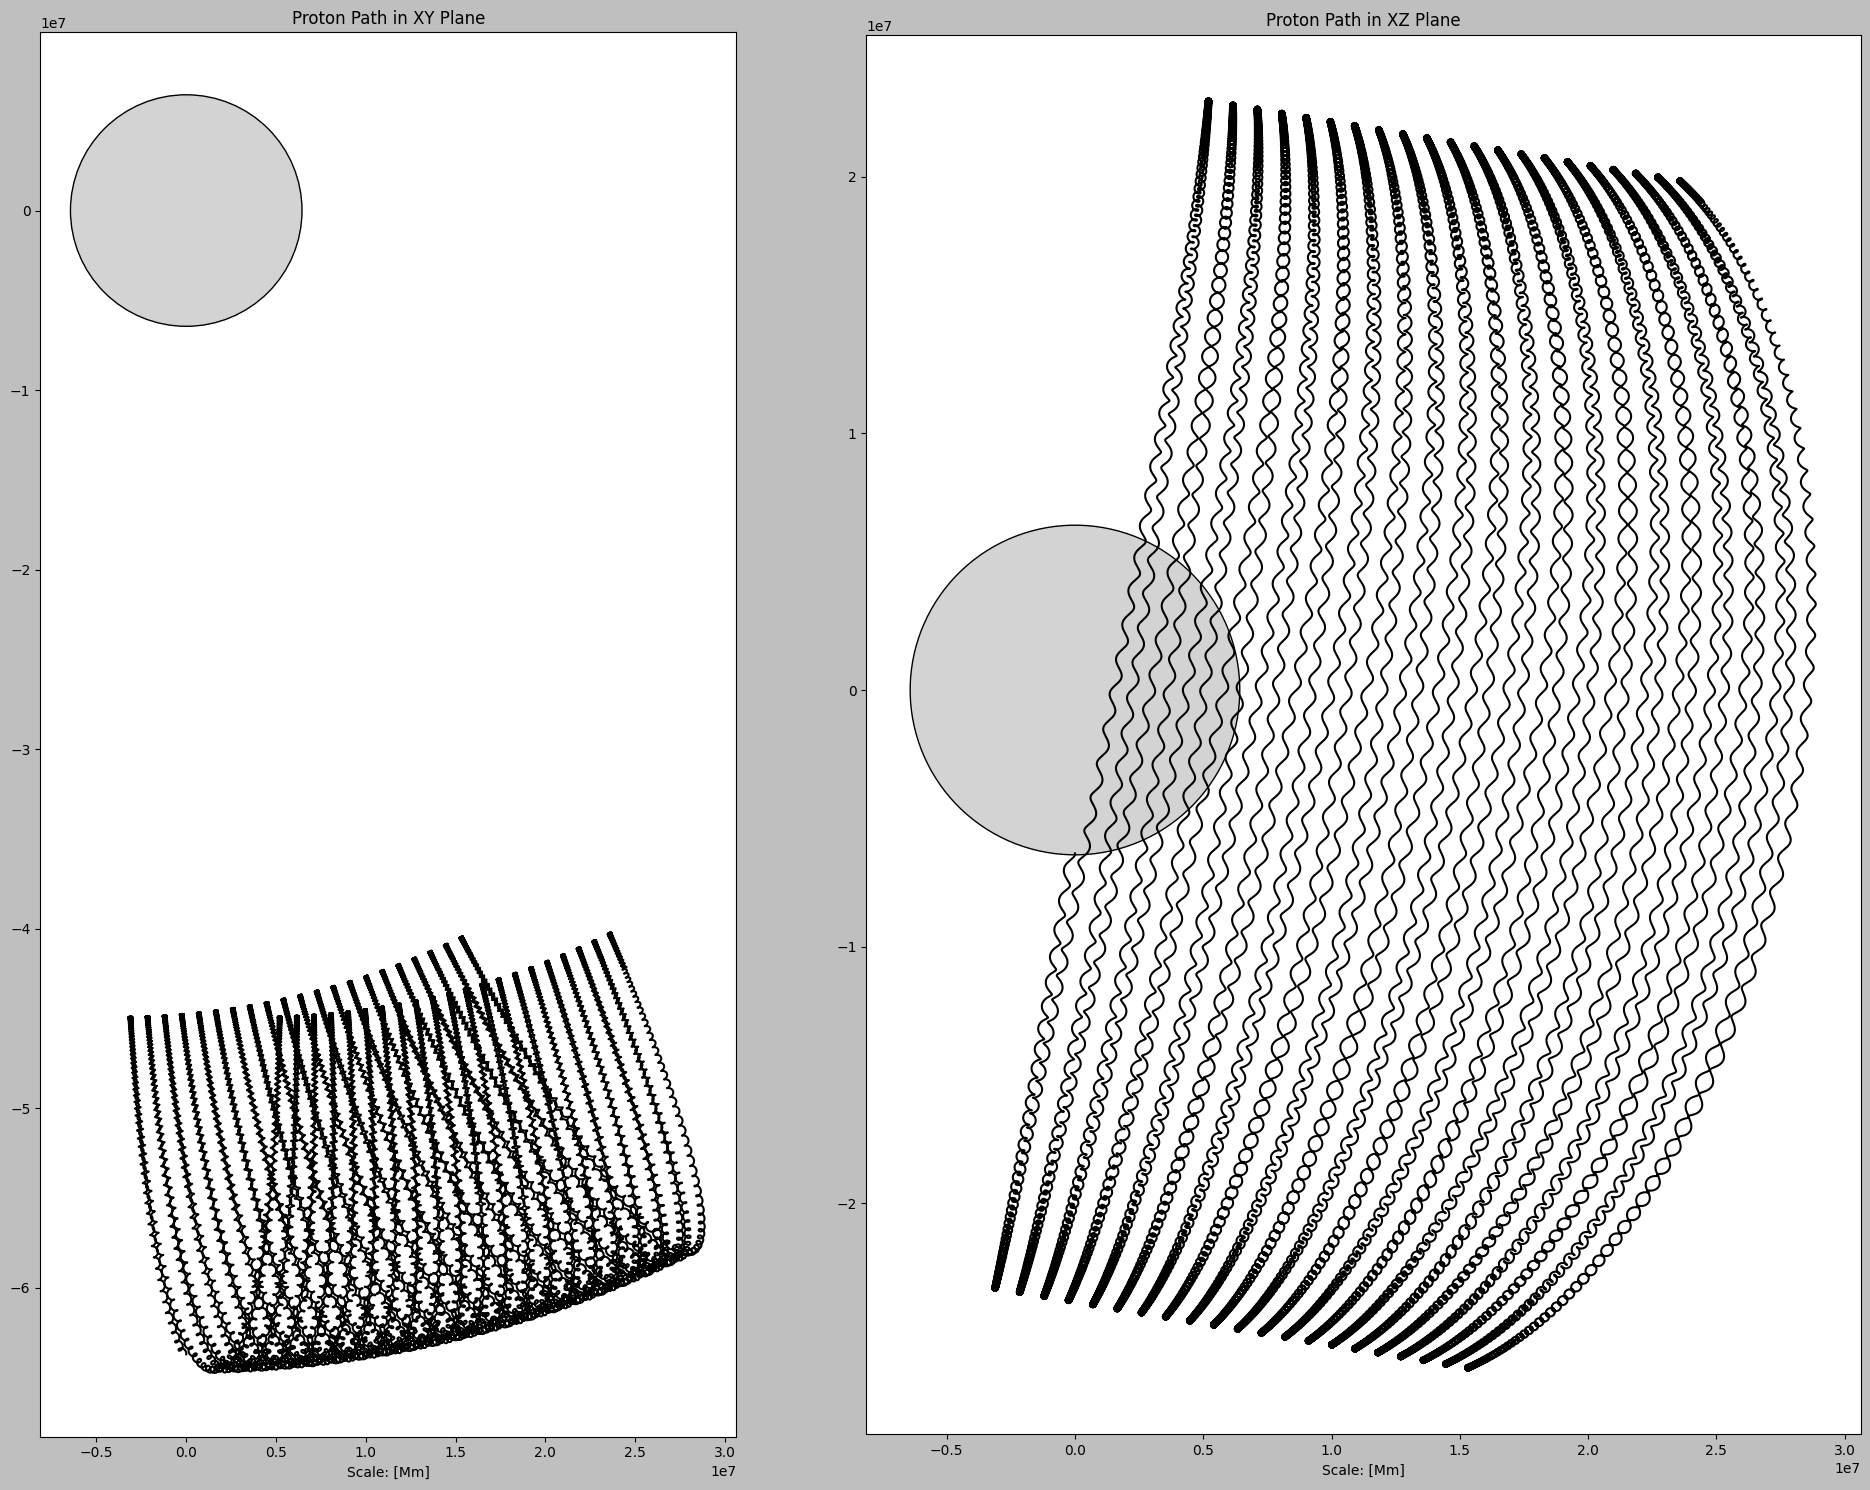

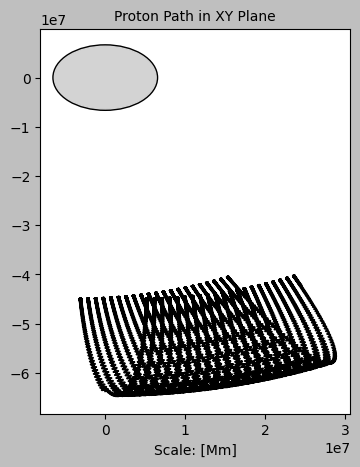

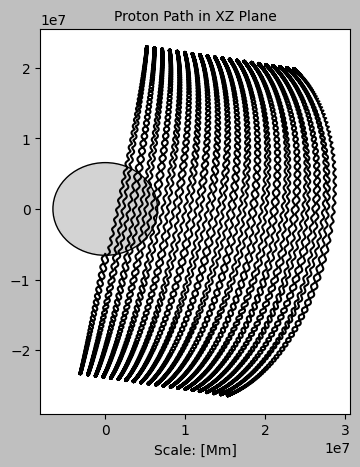

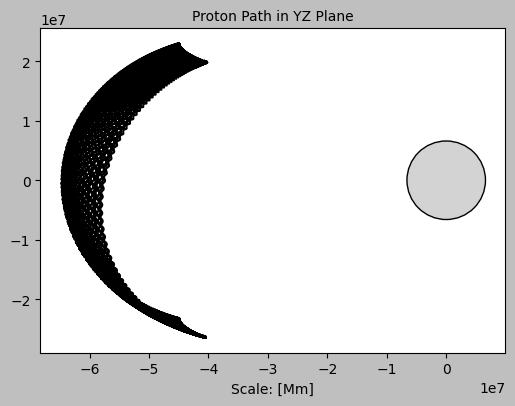

In [9]:
fig_E_2d_A, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,7))
ax1.plot(pos.T[0], pos.T[1])
ax1.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax1.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax1.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax1.set_title('Proton Path in XY Plane', size='medium')
ax1.set_aspect('equal')

ax2.plot(pos.T[0], pos.T[2], zorder = 100)
ax2.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax2.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax2.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax2.set_title('Proton Path in XZ Plane', size='medium')
ax2.set_aspect('equal')

ax3.plot(pos.T[1], pos.T[2])
ax3.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax3.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax3.set_xlabel('Scale: [Mm]')
#ax3.set_ylabel('Z')
ax3.set_title('Proton Path in YZ Plane', size='medium')
ax3.set_aspect('equal')
plt.tight_layout()
plt.show()


fig_E_2d_AA, (ax1, ax2) = plt.subplots(1,2, figsize=(20,15))
ax1.plot(pos.T[0], pos.T[1])
ax1.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax1.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax1.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax1.set_title('Proton Path in XY Plane', size='large')
ax1.set_aspect('equal')

ax2.plot(pos.T[0], pos.T[2], zorder = 100)
ax2.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax2.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax2.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax2.set_title('Proton Path in XZ Plane', size='large')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()



fig_E_2d_A_1, ax = plt.subplots(figsize=(4,5))
ax.plot(pos.T[0], pos.T[1])
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax.set_title('Proton Path in XY Plane', size='medium')
#ax.set_aspect('equal')

fig_E_2d_A_2, ax = plt.subplots(figsize=(4,5))
ax.plot(pos.T[0], pos.T[2], zorder = 100)
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax.set_title('Proton Path in XZ Plane', size='medium')
#ax.set_aspect('equal')

fig_E_2d_A_3, ax = plt.subplots(figsize=(6,5))
ax.plot(pos.T[1], pos.T[2])
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax3.set_ylabel('Z')
ax.set_title('Proton Path in YZ Plane', size='medium')
ax.set_aspect('equal')

In [10]:
M = 1 #number of protons
t_0 = 0
t_f = 1e4
dt = 0.01
T = int((t_f-t_0)/dt)
v_init = np.array([50*1e3, 300*1e3, 400*1e3])    #expected 400e3 m/s
r_init = np.array([0, -5*R_e, 10*R_e])
m = 1
m_vec = np.array([m*np.sin(tilt), 0, m*np.cos(tilt)])

wind_v = np.zeros((M, T, 3))
wind_v[0][0] = v_init
wind_r = np.zeros((M, T, 3))
wind_r[0][0] = r_init
t_vals = np.linspace(t_0, t_f, T)
wind, pos = RK4_method_single(wind_v[0], wind_r[0], T, dt) #for one M

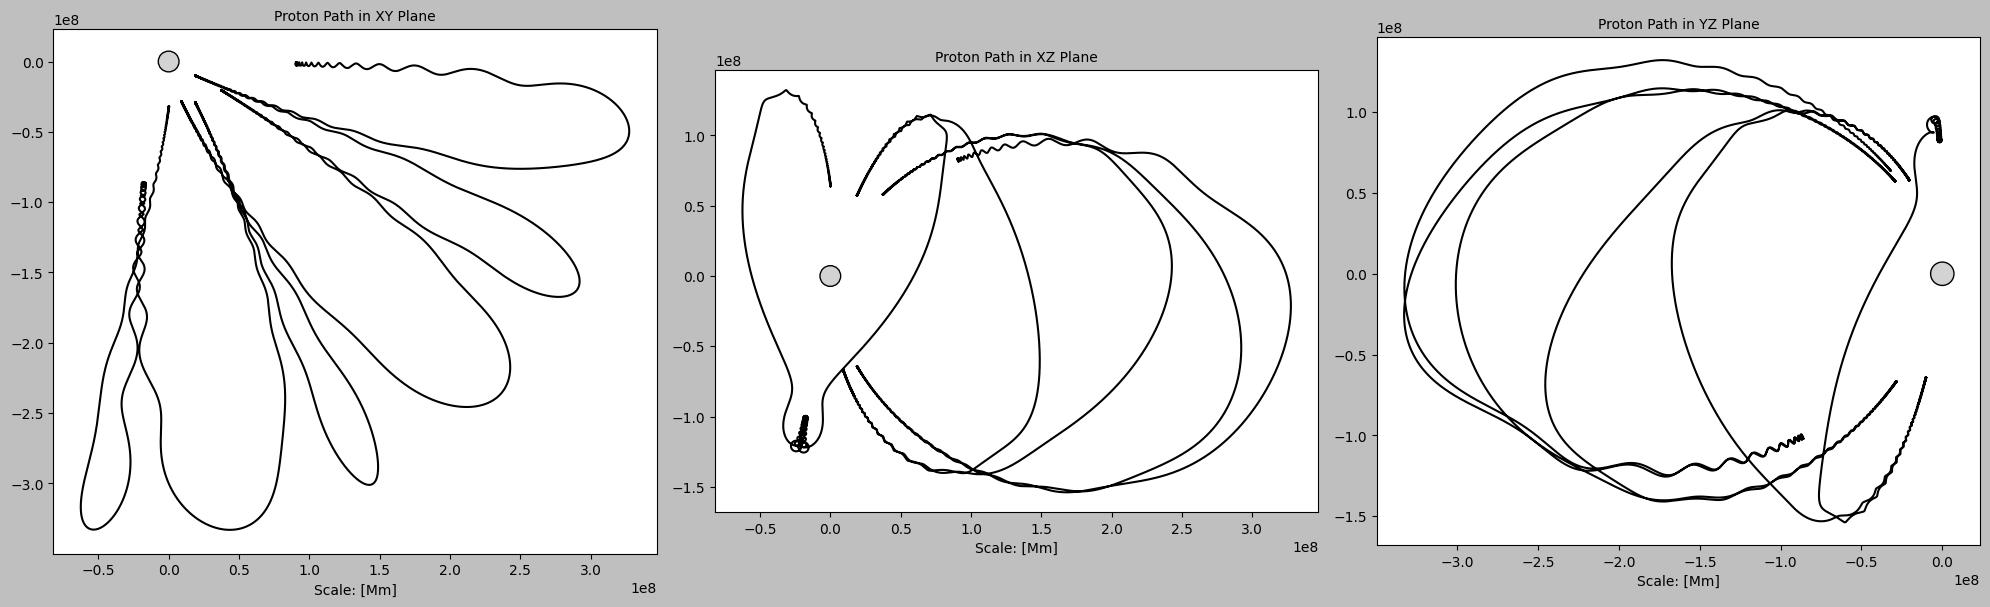

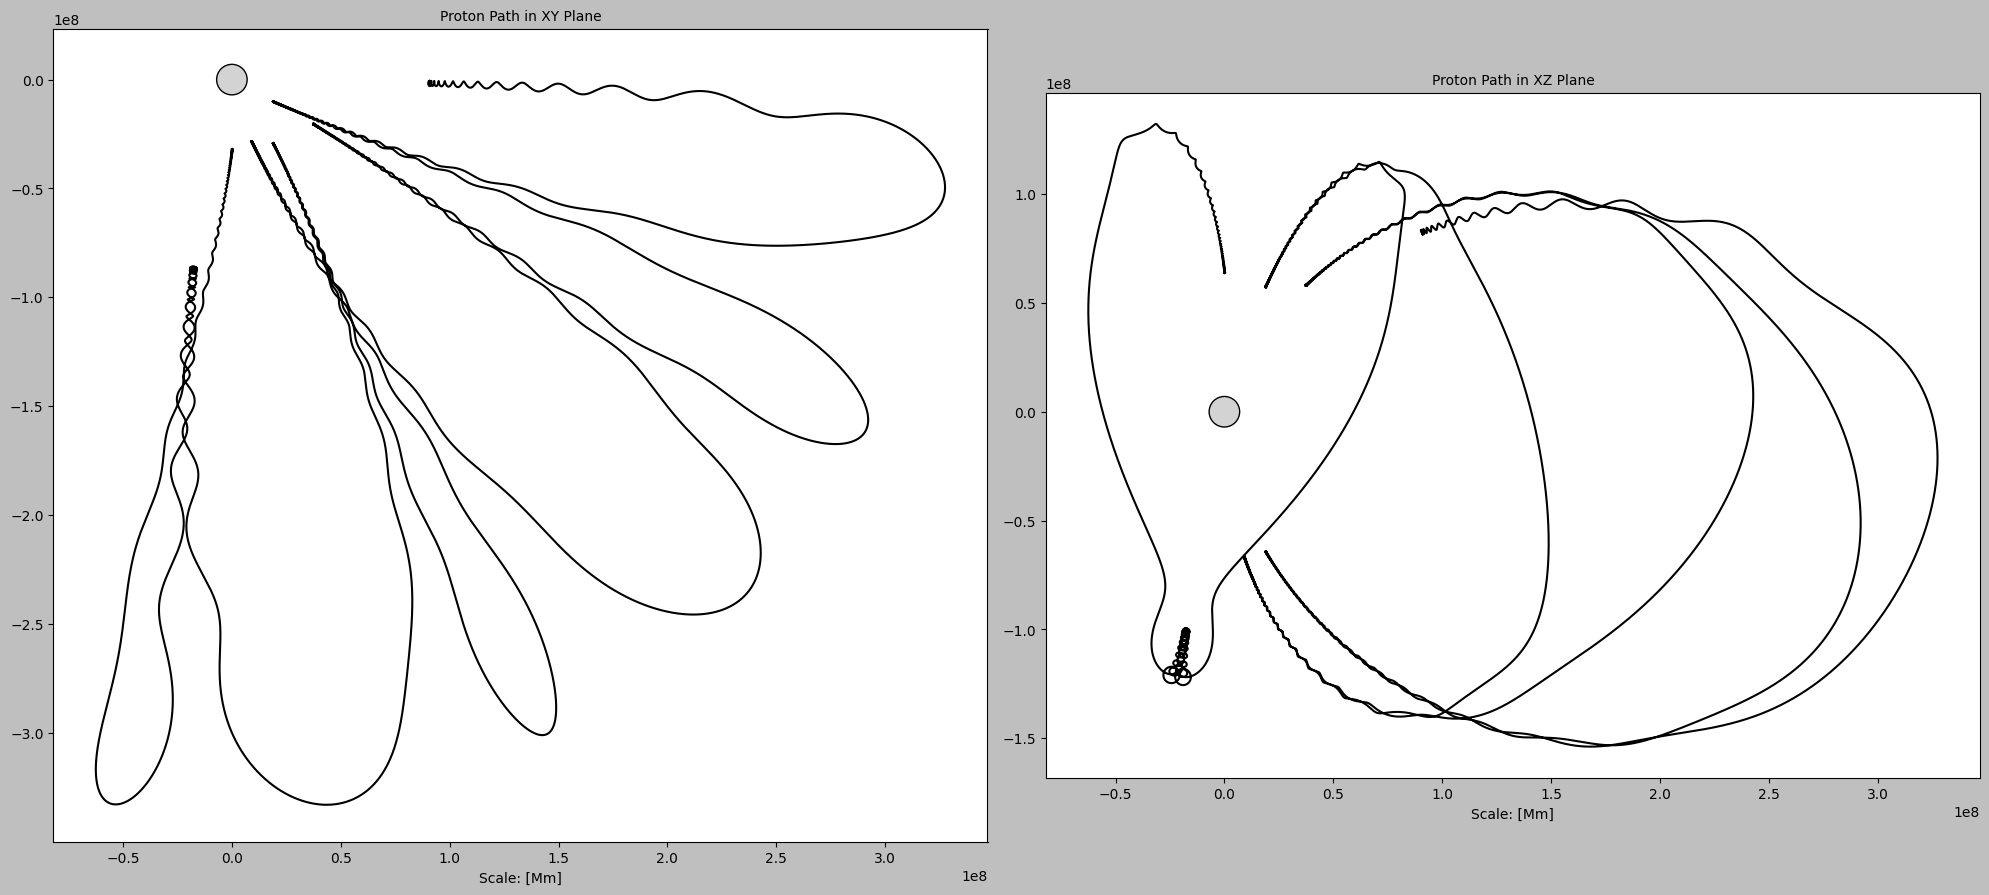

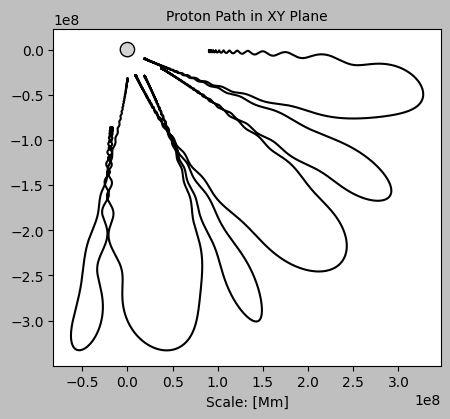

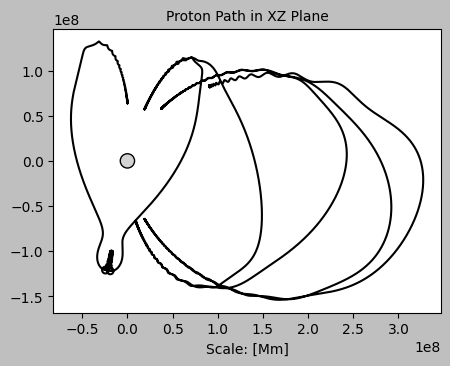

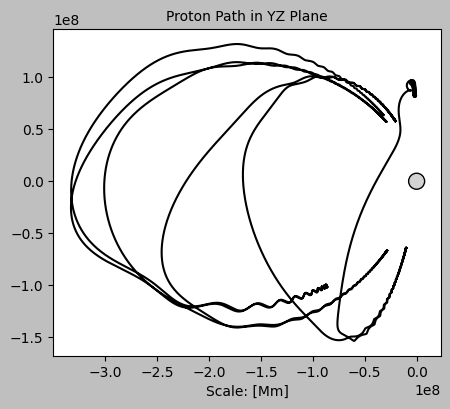

In [11]:
fig_E_2d_B, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,7))
ax1.plot(pos.T[0], pos.T[1])
ax1.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax1.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax1.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax1.set_title('Proton Path in XY Plane', size='medium')
ax1.set_aspect('equal')

ax2.plot(pos.T[0], pos.T[2], zorder = 100)
ax2.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax2.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax2.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax2.set_title('Proton Path in XZ Plane', size='medium')
ax2.set_aspect('equal')

ax3.plot(pos.T[1], pos.T[2])
ax3.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax3.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax3.set_xlabel('Scale: [Mm]')
#ax3.set_ylabel('Z')
ax3.set_title('Proton Path in YZ Plane', size='medium')
ax3.set_aspect('equal')
plt.tight_layout()
plt.show()

fig_E_2d_B, (ax1, ax2) = plt.subplots(1,2, figsize=(20,15))
ax1.plot(pos.T[0], pos.T[1])
ax1.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax1.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax1.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax1.set_title('Proton Path in XY Plane', size='medium')
ax1.set_aspect('equal')

ax2.plot(pos.T[0], pos.T[2], zorder = 100)
ax2.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax2.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax2.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax2.set_title('Proton Path in XZ Plane', size='medium')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

fig_E_2d_B_1, ax = plt.subplots(figsize=(5,5))
ax.plot(pos.T[0], pos.T[1])
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax1.set_ylabel('Y')
ax.set_title('Proton Path in XY Plane', size='medium')
ax.set_aspect('equal')

fig_E_2d_B_2, ax = plt.subplots(figsize=(5,5))
ax.plot(pos.T[0], pos.T[2], zorder = 100)
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 10))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax2.set_ylabel('Z')
ax.set_title('Proton Path in XZ Plane', size='medium')
ax.set_aspect('equal')

fig_E_2d_B_3, ax = plt.subplots(figsize=(5,5))
ax.plot(pos.T[1], pos.T[2])
ax.add_patch(Circle((0,0), R_e, color='lightgrey', zorder = 100))
ax.add_patch(Circle((0,0), R_e, color='black', linewidth = 3, fill = False))
ax.set_xlabel('Scale: [Mm]')
#ax3.set_ylabel('Z')
ax.set_title('Proton Path in YZ Plane', size='medium')
ax.set_aspect('equal')

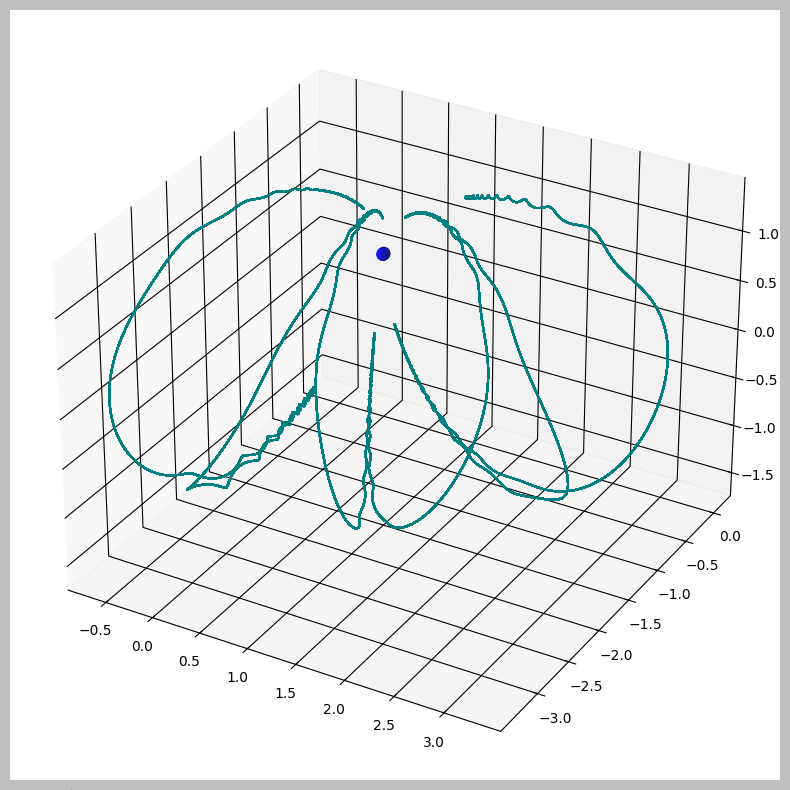

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

#ax = fig.gca(projection='3d')

fig_E_3d = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')
#ax.grid(b = True, color = False, linestyle ='-', linewidth = 0.1, alpha = 0.1) 
plot = ax.scatter(pos.T[0], pos.T[1], pos.T[2], color = 'teal', s=0.1)

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
k = R_e*np.cos(u)*np.sin(v)
l = R_e*np.sin(u)*np.sin(v)
m = R_e*np.cos(v)
# alpha controls opacity
ax.plot_surface(k, l, m, color="b", alpha=1)

fig_E_3d.set_tight_layout(3)
plt.show()

### Test Condition: Energy Conservation

In [13]:
M = 1 
t_0 = 0
t_f = 1e4

dt = 0.01
T = int((t_f-t_0)/dt)
v_init = np.array([50*1e3, 400*1e3, -300*1e3])    #expected 400e3 m/s
r_init = np.array([0, -10*R_e, -R_e])
m = 1
m_vec = np.array([m*np.sin(tilt), 0, m*np.cos(tilt)])
wind_v = np.zeros((M, T, 3))
wind_v[0][0] = v_init
wind_r = np.zeros((M, T, 3))
wind_r[0][0] = r_init
t_vals = np.linspace(t_0, t_f, T)
wind, pos = RK4_method_single(wind_v[0], wind_r[0], T, dt) #for one M

speed = np.linalg.norm(wind, axis=1)
speed_ref = speed[0]  
#dv = np.linalg.norm(wind[1:]-wind[:-1], axis=1)      
dspeed = np.abs(speed[1:]-speed[:-1])   
rat_A = dspeed/speed_ref
e_g_A = np.abs(np.max(speed)-np.min(speed))/speed_ref
print(e_g_A)
e_g_A = format(e_g_A, '.4e')
t_A = t_vals[1:]

#-------------------------------------------------------------------------------------

dt = 0.01
T = int((t_f-t_0)/dt)
v_init = np.array([50*1e3, 300*1e3, 400*1e3])    #expected 400e3 m/s
r_init = np.array([0, -5*R_e, 10*R_e])
m = 1
m_vec = np.array([m*np.sin(tilt), 0, m*np.cos(tilt)])
wind_v = np.zeros((M, T, 3))
wind_v[0][0] = v_init
wind_r = np.zeros((M, T, 3))
wind_r[0][0] = r_init
t_vals = np.linspace(t_0, t_f, T)
wind, pos = RK4_method_single(wind_v[0], wind_r[0], T, dt) #for one M

speed = np.linalg.norm(wind, axis=1)
speed_ref = speed[0]  
#dv = np.linalg.norm(wind[1:]-wind[:-1], axis=1)      
dspeed = np.abs(speed[1:]-speed[:-1])   
rat_B = dspeed/speed_ref
#rat_C = rat_B[1::2]
e_g_B = np.abs(np.max(speed)-np.min(speed))/speed_ref
print(e_g_B)
e_g_B = format(e_g_B, '.4e')
t_B = t_vals[1:]
#t_C = t_B[1::2]

1.7829421422872894e-05
6.917265992726411e-08


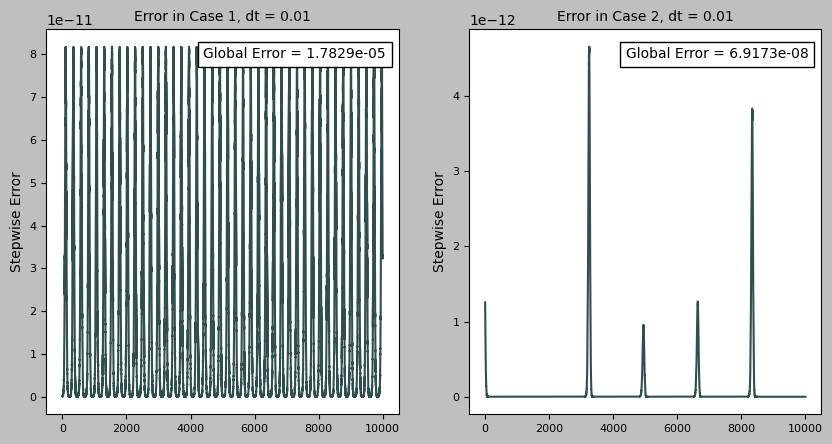

In [14]:
fig_F_A, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(t_A, rat_A, color = 'darkslategray', label='e_s')
#ax1.plot(t_A, e_g_A*np.ones(t_A.shape), color = 'b', ls = '--', label='e_g')
ax1.set_title('Error in Case 1, dt = 0.01', size='medium')
ax1.text(4400, 7.9e-11, f'Global Error = {e_g_A}', bbox=dict(facecolor='white', alpha=1))
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('Stepwise Error')
#ax1.legend()

ax2.plot(t_B, rat_B, color = 'darkslategray', label='e_s')
#ax2.plot(t_B, e_g_B*np.ones(t_B.shape), color = 'g', ls = '--', label='e_g')
ax2.set_title('Error in Case 2, dt = 0.01', size ='medium')
ax2.text(4400, 4.5*1e-12, f'Global Error = {e_g_B}', bbox=dict(facecolor='white', alpha=1))
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_ylabel('Stepwise Error')
#ax2.legend()
plt.show()